In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("Lionel Messi Goals.csv")
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [42]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


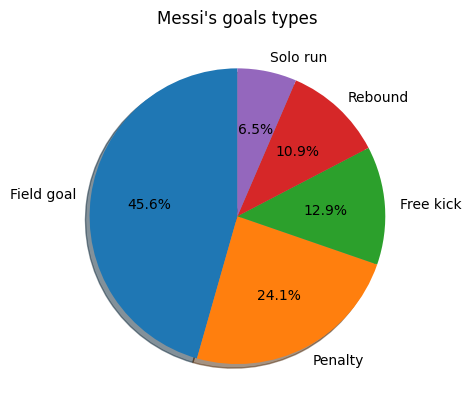

In [43]:
plt.pie(df["count"], labels=df["Goal Type"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Messi's goals types")
plt.show()

In [44]:
df = data["Goal Method"].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


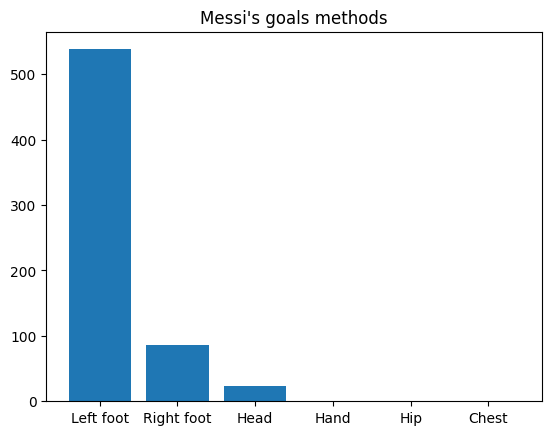

In [45]:
plt.bar(df["Goal Method"], df["count"])
plt.title("Messi's goals methods")
plt.show()

In [46]:
# Preprocessing
data["Minute"] = data["Minute"].apply(eval)

In [47]:
data["Minute"] = data["Minute"].astype(int)

In [48]:
df = data["Minute"].value_counts().reset_index().sort_values(by=["Minute"], ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


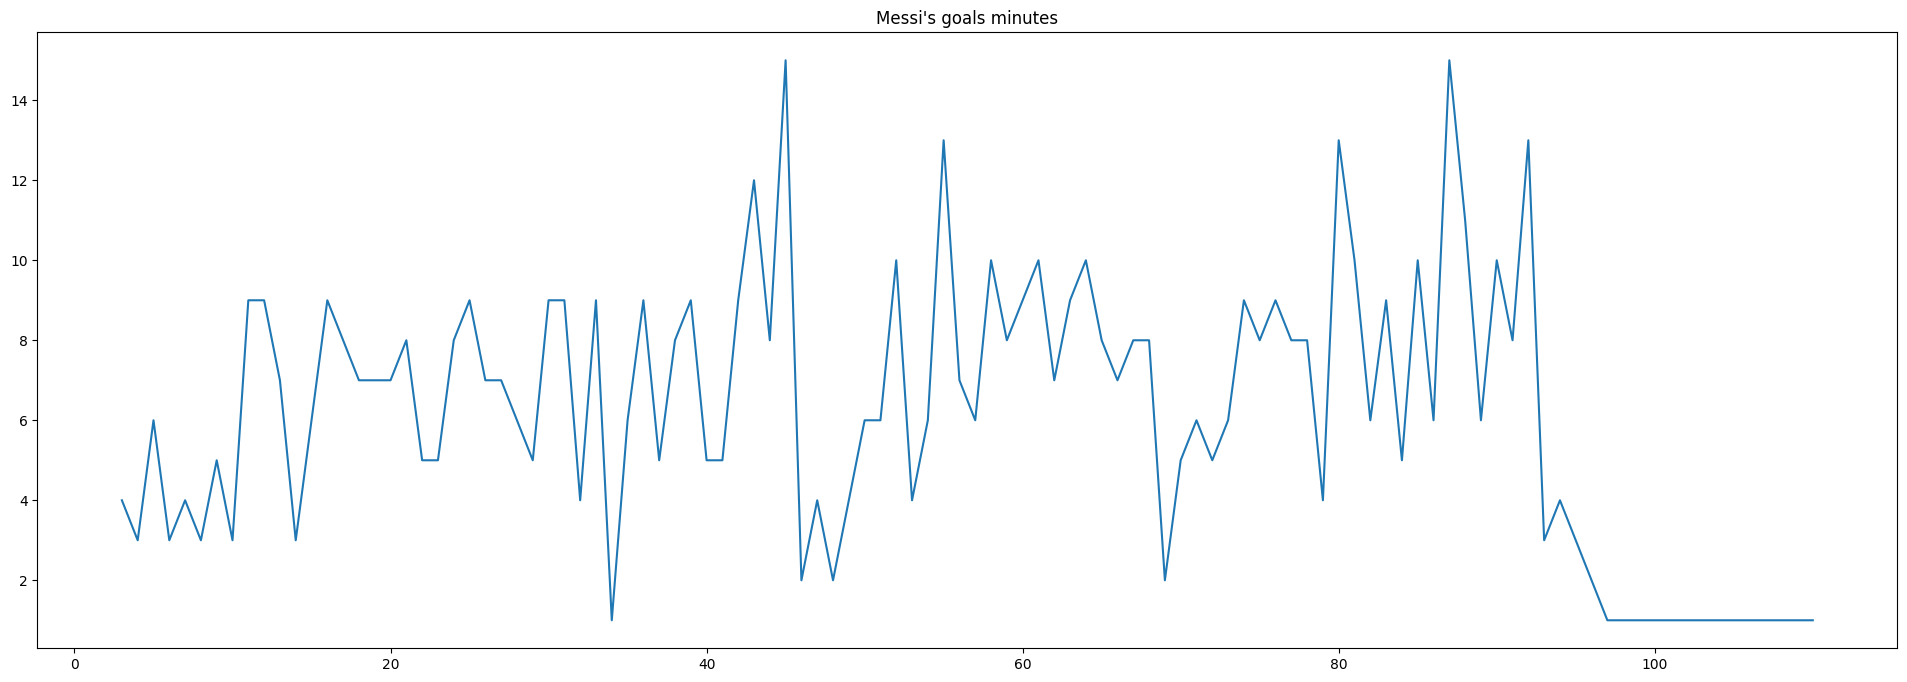

In [49]:
plt.figure(figsize=(24, 8))
plt.plot(df["Minute"], df["count"])
plt.title("Messi's goals minutes")
plt.show()

A. Messi's goals in each year

In [50]:
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [51]:
# Date column preprocessing
data1 = data
data1['Date'] = data1['Date'].to_numpy(str)

date_list = []
for date in data1['Date'] :
    date_list.append( date[-4:])
    
data1['Date'] = date_list

data1.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [57]:
# Home + Away Goals
data1['Goals'] = data['Score Home Team - When Messi Scored'] + data['Score Away Team - When Messi Scored']

In [58]:
data1.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Goals
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,1
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,1


In [59]:
data_goal = data1.groupby(['Date'])['Goals'].sum().reset_index()
data_goal

,Date,Goals
0,2005,7
1,2006,38
2,2007,83
3,2008,56
4,2009,111
5,2010,156
6,2011,156
7,2012,280
8,2013,118
9,2014,177


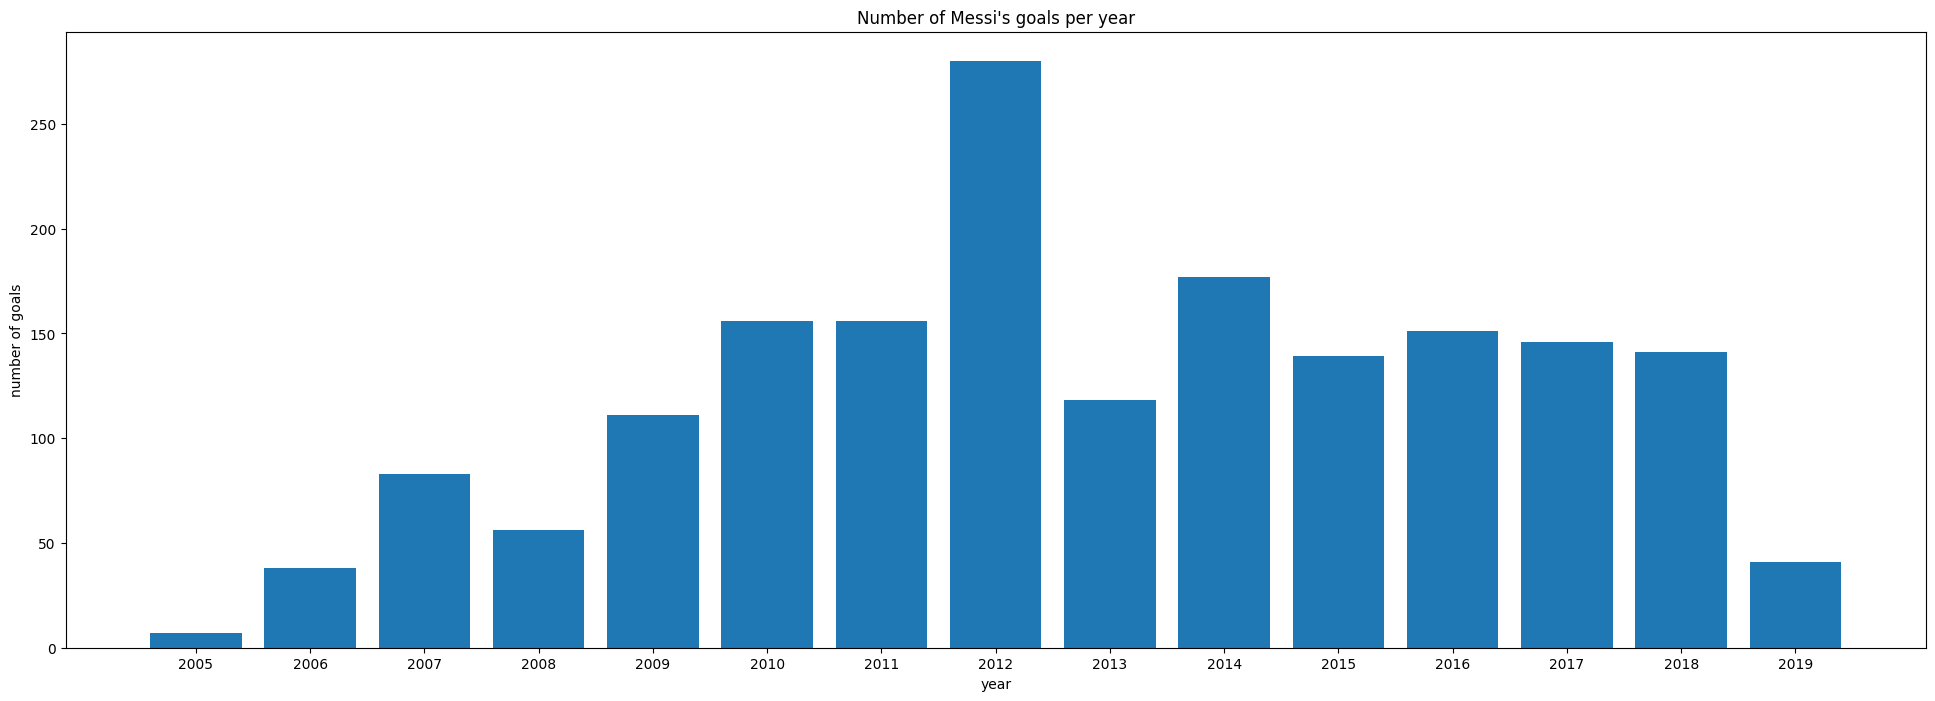

In [62]:
plt.figure(figsize=(24, 8))
plt.bar(data_goal["Date"], data_goal["Goals"])
plt.xlabel("year")
plt.ylabel("number of goals")
plt.title("Number of Messi's goals per year")
plt.savefig("output/1.jpg")
plt.show()

In [56]:

data_goal = data1.groupby(['Date'])['Score Home Team - When Messi Scored'].sum().reset_index()
data_goal

,Date,Score Home Team - When Messi Scored
0,2005,7
1,2006,25
2,2007,41
3,2008,21
4,2009,59
5,2010,91
6,2011,106
7,2012,150
8,2013,72
9,2014,108


In [54]:
df = data1["Date"].value_counts().head().reset_index()
df

,Date,count
0,2012,91
1,2010,60
2,2016,59
3,2011,59
4,2014,58


In [52]:
df = data1.groupby(data1['Date'])['Score Home Team - When Messi Scored']
df